In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiofiles                      23.1.0
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.12
altair                        4.2.2
anaconda-client               1.11.0
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
back

In [3]:
import tensorflow as tf
import os

In [4]:
import cv2
import imghdr

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
data_dir = 'data'

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [9]:
# Use ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.3)

In [10]:
# Load train set
train = datagen.flow_from_directory(directory=data_dir, target_size=(256, 256),
                                     class_mode='binary', batch_size=32, subset='training')

Found 398 images belonging to 2 classes.


In [11]:
# Load validation set
val = datagen.flow_from_directory(directory=data_dir, target_size=(256, 256),
                                     class_mode='binary', batch_size=32, subset='validation')

Found 169 images belonging to 2 classes.


In [12]:
# Load test set
test = datagen.flow_from_directory(directory=data_dir, target_size=(256, 256),
                                    class_mode='binary', batch_size=32, shuffle=False, subset='validation')

Found 169 images belonging to 2 classes.


In [13]:
#build Deep learning model

In [14]:
#train
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy', tf.metrics.Precision(), tf.metrics.Recall(), tf.metrics.BinaryAccuracy()])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [15]:
#train

logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, epochs=20, validation_data=val) 

Epoch 1/20
13/13 [==============================] - 9s 648ms/step - loss: 0.9836 - accuracy: 0.4975 - precision: 0.5078 - recall: 0.7951 - binary_accuracy: 0.4975 - val_loss: 0.6872 - val_accuracy: 0.5148 - val_precision: 0.5148 - val_recall: 1.0000 - val_binary_accuracy: 0.5148
Epoch 2/20
13/13 [==============================] - 8s 598ms/step - loss: 0.6730 - accuracy: 0.5452 - precision: 0.5311 - recall: 1.0000 - binary_accuracy: 0.5452 - val_loss: 0.6631 - val_accuracy: 0.6331 - val_precision: 0.5839 - val_recall: 1.0000 - val_binary_accuracy: 0.6331
Epoch 3/20
13/13 [==============================] - 8s 590ms/step - loss: 0.6368 - accuracy: 0.6633 - precision: 0.6086 - recall: 0.9707 - binary_accuracy: 0.6633 - val_loss: 0.6136 - val_accuracy: 0.7456 - val_precision: 0.7750 - val_recall: 0.7126 - val_binary_accuracy: 0.7456
Epoch 4/20
13/13 [==============================] - 8s 603ms/step - loss: 0.5210 - accuracy: 0.8367 - precision: 0.8684 - recall: 0.8049 - binary_accuracy: 0.83

In [16]:
# Make predictions on the test set
y_pred = (model.predict(test) > 0.5).astype("int32")

6/6 [==============================] - 1s 220ms/step


In [17]:
# Print classification report
import sklearn.metrics as metrics
print(metrics.classification_report(test.labels, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86        82
           1       0.98      0.71      0.83        87

    accuracy                           0.85       169
   macro avg       0.87      0.85      0.84       169
weighted avg       0.88      0.85      0.84       169



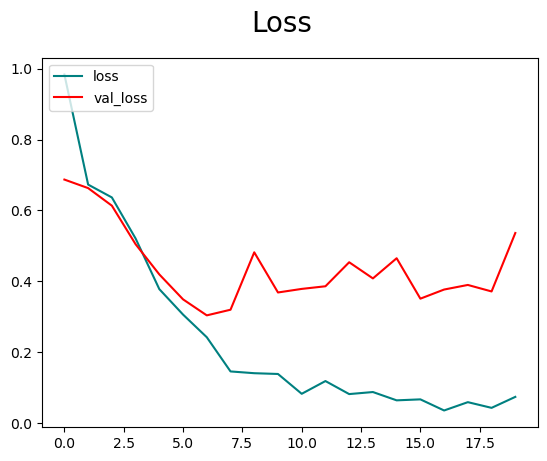

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

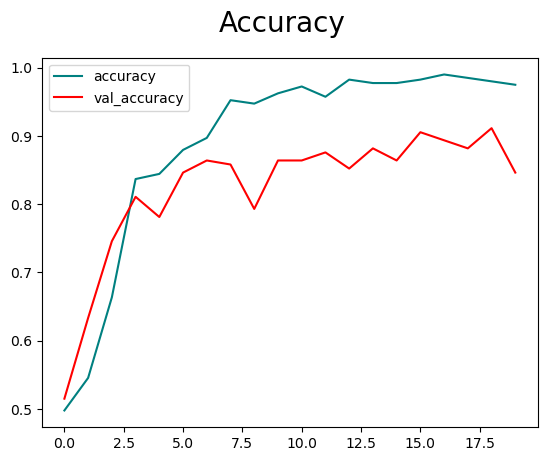

In [19]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

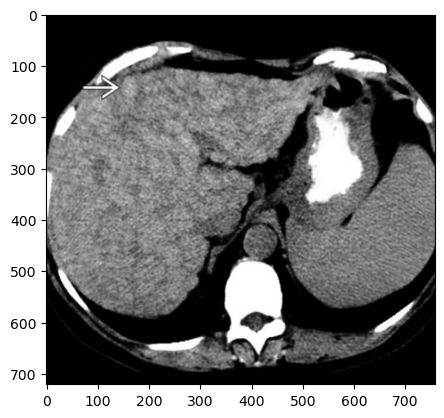

In [27]:
import cv2
img = cv2.imread('data/cirrhotic_liver/cirliv.jpeg')
plt.imshow(img)
plt.show()

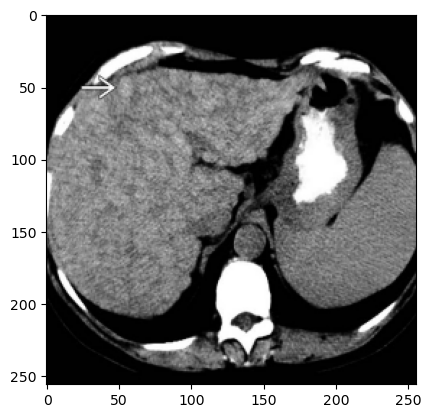

In [28]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [29]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [30]:
yhat

array([[0.9811282]], dtype=float32)

In [31]:
if yhat > 0.5: 
    print(f'Predicted class is Cirrhotic Liver')
else:
    print(f'Predicted class is Normal Liver')

Predicted class is Cirrhotic Liver


In [32]:
# Save the model
model.save("liver_model.h5")

# Load the saved model
from tensorflow.keras.models import load_model
saved_model = load_model("liver_model.h5")


In [33]:
# Read in a single image
image_path = "data/cirrhotic_liver/cirliv.jpeg"
img = cv2.imread(image_path)

# Preprocess the image using the same steps as the training data
img = cv2.resize(img, (256, 256))
img = img / 255.0

# Make a prediction on the preprocessed image using the loaded model
prediction = saved_model.predict(np.array([img]))

# Print the predicted class
if prediction[0] > 0.5:
    print("Cirrhotic liver")
else:
    print("Normal liver")


1/1 [==============================] - 0s 71ms/step
Cirrhotic liver
